Uniform mean =  0.5004 stdev =  0.2884
Uniform Expected mean =     0.5 Expected stdev =  0.2887

Binomial mean =   2.487 stdev =   1.109
Binomial Expected mean =     2.5 Expected stdev =   1.118

Poisson mean =   2.003 stdev =   1.421
Poisson Expected mean =     2.0 Expected stdev =   1.414

Normal mean =   9.991 stdev =   1.996
Normal Expected mean =    10.0 Expected stdev =     2.0



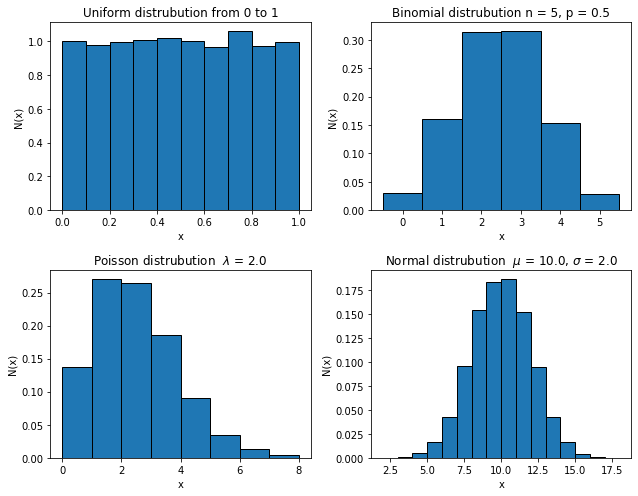

In [13]:
%matplotlib inline
import numpy as npy
import matplotlib.pyplot as plt
import scipy.io as sio

def meanSD(x):
    
    #Calculate Mean of array
    mean = sum(x)/len(x)
    
    #Calculate SD of array
    sd = 0.
    for v in x:
        sd += (v-mean)**2   
    sd = (sd/len(x))**0.5
    
    return mean, sd

def printMeanSD(title,x,expected_mean,expected_std):
    m,s = meanSD(x)
    print(title+" mean = {:7.4} stdev = {:7.4}".format(m,s))
    print(title+" Expected mean = {:7.4} Expected stdev = {:7.4}".format(expected_mean,expected_std))
    print("")
    
ndata=10000

#uniform distribution from 0->1
a=0 # a and b are the parameters for unifrand
b=1.0 # use help(npy.random.uniform) for details of the function

#binomial dist
n = 5
probabililty = 0.5

#poisson dist
lmda = 2. # Lambda

#norm
mu = 10.
sig = 2.

from scipy.stats import uniform, binom, poisson, norm

u_data = uniform.rvs(a,b,size=ndata) # Uniform Data
printMeanSD('Uniform',u_data,(b-a)/2,(b-a)/(12**0.5))

binom_data = binom.rvs(n,probabililty,size=ndata) # Binomial Dist Data
printMeanSD('Binomial',binom_data,n*probabililty,((n*probabililty)*(1-probabililty))**0.5)

poisson_data = poisson.rvs(lmda,size=ndata) # Poisson Dist Data
printMeanSD('Poisson',poisson_data,lmda,lmda**0.5)

norm_data = norm.rvs(mu,sig,size=ndata) # Poisson Dist Data
printMeanSD('Normal',norm_data,mu,sig)

# Figure
f = plt.figure(figsize=(9,7)) # make a bigger 9cm x 7cm figure

# Uniform
p = plt.subplot(2,2,1) # split into 2,2 plots (1st and 2nd digit) and return 1st (3rd digit)
u_hist = p.hist(u_data, edgecolor='black', linewidth=1, density=True)
p.set_title("Uniform distrubution from 0 to 1")
p.set_xlabel('x')
p.set_ylabel('N(x)')

# Binomial
p = plt.subplot(2,2,2)
binom_hist = p.hist(binom_data, align='left', bins=n+1, range=(0,n+1), edgecolor='black', linewidth=1, density=True)
p.set_title("Binomial distrubution n = "+str(n)+", p = "+str(probabililty))
p.set_xlabel('x')
p.set_ylabel('N(x)')

# Poisson
p = plt.subplot(2,2,3)
spr = 4
poisson_hist = p.hist(poisson_data, bins=int(lmda*spr), range=(0,int(spr*lmda)), edgecolor='black', linewidth=1, density=True)
p.set_title("Poisson distrubution  $\lambda$ = "+str(lmda))
p.set_xlabel('x')
p.set_ylabel('N(x)')

# Normal
p = plt.subplot(2,2,4)
spr = int(4*sig) # number of Std to display on the graph.
norm_hist = p.hist(norm_data, bins=2*spr, range=(mu-spr, mu+spr), edgecolor='black', linewidth=1, density=True)
p.set_title("Normal distrubution  $\mu$ = "+str(mu)+", $\sigma$ = "+str(sig))
p.set_xlabel('x')
p.set_ylabel('N(x)')


plt.tight_layout()
plt.show()
